#<img src="https://static.junilearning.com/images/juni_logo.png" height=75 align=center hspace="5px"> **DS12 Project 1: Master Project**

Create your own EDA from scratch! Start by picking a research topic that interests you, and then formulate a few specific research questions that you would like to answer. Pick an appropriate dataset. Then, using a combination of statistics and at least three plots, answer your questions! Make sure to write out your findings in a clear and concise way. <br><br>

**Resources for datasets:**

Downloadable Files:
* Kaggle: https://www.kaggle.com/datasets
* FiveThirtyEight: https://data.fivethirtyeight.com/
* BuzzFeedNews: https://github.com/BuzzFeedNews
* Data.gov: https://www.data.gov/
* NASA Earth Science: https://earthdata.nasa.gov/
* NASA Space: https://pds.nasa.gov/datasearch/data-search/

Public Web APIs:
* Curated List: https://github.com/public-apis/public-apis
* Searchable Directory: https://www.programmableweb.com/apis/directory<br>

Or use anything else you can find online!

In [ ]:
# Out of all the planets, what are ones that are most similar to earth conditions (bunch of seperate graphs to get a result)
# how does solar activity relate to Earth's weather
# How can we quantify shapes and patterns of galaxies and what patterns emerge in spatial distribuion

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
planets = pd.read_csv('/content/drive/MyDrive/archive-3/planets.csv')
satellites = pd.read_csv('/content/drive/MyDrive/archive-3/satellites.csv')

In [ ]:
planets

,planet,mass,diameter,density,gravity,escape_velocity,rotation_period,length_of_day,distance_from_sun,perihelion,aphelion,orbital_period,orbital_velocity,orbital_inclination,orbital_eccentricity,obliquity_to_orbit,mean_temperature,surface_pressure,number_of_moons,has_ring_system,has_global_magnetic_field
0,Mercury,0.3300,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,69.8,88.0,47.4,7.0,0.205,0.034,167,0,0,No,Yes
1,Venus,4.8700,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,108.9,224.7,35.0,3.4,0.007,177.400,464,92,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Neptune,102.0000,49528,1638,11.0,23.5,16.1,16.1,4495.1,4444.5,4545.7,59800.0,5.4,1.8,0.011,28.300,-200,Unknown*,14,Yes,Yes
8,Pluto,0.0146,2370,2095,0.7,1.3,-153.3,153.3,5906.4,4436.8,7375.9,90560.0,4.7,17.2,0.244,122.500,-225,0.00001,5,No,Unknown


In [ ]:
satellites

,planet,name,gm,radius,density,magnitude,albedo
0,Earth,Moon,4902.801±0.001,1737.5±0.1,3.344±0.005,-12.74,0.12
1,Mars,Phobos,0.0007112±0.0000010,11.1±0.15,1.872±0.076,11.4±0.2,0.071±0.012
...,...,...,...,...,...,...,...
175,Pluto,Kerberos,0.0011±0.0005,14.0,1.4,26.1V±0.3,0.35
176,Pluto,Styx,0.0000±0.0008,10.0,?,27.0V±0.3,0.35


<Axes: xlabel='planet', ylabel='gravity'>

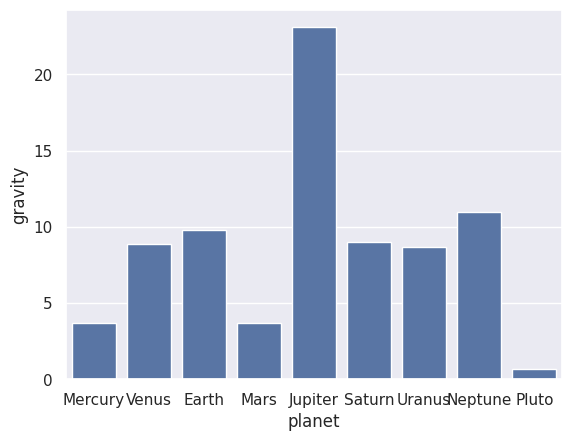

In [ ]:
sns.barplot(data = planets, x = "planet", y = "gravity")

In [ ]:
# Constants:
# Units of NEWTON_GRAV_CONST = (N*m^2)/kg^2
NEWTON_GRAV_CONST = (6.67430)*(10**-11)

# Funtions to calculate gravity in several different scenarios
# g() should be used for the planets data frame, because units in this function match that dataframe's units
# Input should be in kg, (diameter)km
def g(M, r):
  # Conversion from m/10^24kg to kg
  M *= (10**24)
  r /= 2
  r *= 1000
  return (NEWTON_GRAV_CONST*M)/r**2

# Input should be in kg, m
def g_exo(M, r):
  return (NEWTON_GRAV_CONST*M)/r**2

# Returns units in m/s^2
def gfromd(r, d, v):
  # v km -> m
  v *= 10**9
  d *= 1000
  m = (d*v)
  r *= 1000
  return (NEWTON_GRAV_CONST*m)/r**2

# Converts radius to volume
# Returns units in km^3
def v(r):
  return 4/3*(math.pi)*r**3

In [ ]:
# Formatting df tables
pd.set_option("display.max_rows", None)
satellites = satellites.drop(satellites.index[176])

In [ ]:
# Creating new columns in the satellites df
# Volume column
volume = []
for i in satellites["radius"]:
  intVal = ""
  for j in i:
    if j == "±":
      break
    else:
      intVal += j
  intVal = float(intVal)
  vol = v(intVal)
  volume.append(vol)
satellites["volume"] = volume

# Gravity column
gravity = []
radius_list = satellites["radius"]
density_list = satellites["density"]
for i in range(len(radius_list)):
  intVal = ""
  for j in radius_list[i]:
    if j == "±":
      break
    else:
      intVal += j
  radius_list[i] = float(intVal)

for i in range(len(density_list)):
  intVal = ""
  for j in density_list[i]:
    if j == "±":
      break
    else:
      intVal += j
  density_list[i] = float(intVal)

for i in range(len(radius_list)):
  r = float(radius_list[i])
  if density_list[i] == "NA":
    break
  else:
    d = float(density_list[i])
  g = gfromd(r, d, v(r))
  gravity.append(g)
satellites["gravity (m/s^2)"] = gravity

# Satellites formatting column names
satellites.rename(columns = {"gm":"gm (km3/sec2)", "radius":"radius (km)", "density":"density (g/cm^3)", "volume":"volume (km^3)"})


satellites

<ipython-input-189-1a65f85db887>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radius_list[i] = float(intVal)
<ipython-input-189-1a65f85db887>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  density_list[i] = float(intVal)


,planet,name,gm,radius,density,magnitude,albedo,volume,gravity (m/s^2)
0,Earth,Moon,4902.801±0.001,1737.5,3.344,-12.74,0.12,2.197167e+10,1.622595
1,Mars,Phobos,0.0007112±0.0000010,11.1,1.872,11.4±0.2,0.071±0.012,5.728719e+03,0.005803
2,Mars,Deimos,0.0000985±0.0000024,6.2,1.471,12.45±0.05,0.068±0.007,9.983060e+02,0.002547
3,Jupiter,Io,5959.916±0.012,1821.6,3.528,5.02±0.03,0.63±0.02,2.531906e+10,1.794736
4,Jupiter,Europa,3202.739±0.009,1560.8,3.013,5.29±0.02,0.67±0.03,1.592687e+10,1.313305
5,Jupiter,Ganymede,9887.834±0.017,2631.2,1.942,4.61±0.03,0.43±0.02,7.630451e+10,1.426994
6,Jupiter,Callisto,7179.289±0.013,2410.3,1.834,5.65±0.10,0.17±0.02,5.865458e+10,1.234495
7,Jupiter,Amalthea,0.138±0.030,83.45,0.849,14.1±0.2,0.090±0.005,2.434264e+06,0.019786
8,Jupiter,Himalia,0.45,85.0,2.6,14.2R,0.04,2.572441e+06,0.061718
9,Jupiter,Elara,0.058,43.0,2.6,16.0R,0.04,3.330381e+05,0.031222


Similar planets to Earth within the solar system.

<Axes: title={'center': 'Gravity of Each Planet'}, xlabel='gravity', ylabel='planet'>

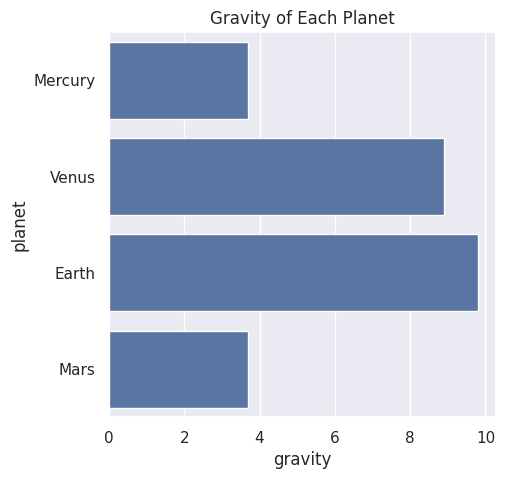

In [ ]:
# Narrowing down the planets dataset to get a better idea of those that are similar based on gravity and diameter
planets = planets[(planets["gravity"] > 3) & (planets["gravity"] < 10) & (planets["diameter"] < 15000)]
plt.figure().set_size_inches(5,5)
plt.title("Gravity of Each Planet")
sns.barplot(data = planets, x = "gravity", y = "planet")

Relatively similar moons

<Axes: title={'center': 'Gravity of Each Moon'}, xlabel='gravity (m/s^2)', ylabel='name'>

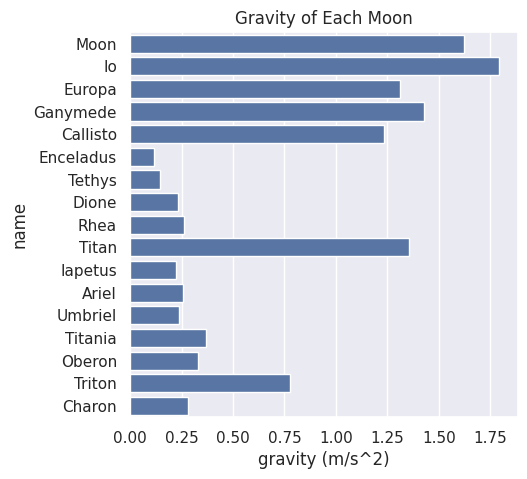

In [ ]:
# Comparing the gravities in m/s^2 of each moon in the solar system
satellites = satellites[satellites["gravity (m/s^2)"] > 0.1]
plt.figure().set_size_inches(5,5)
plt.title("Gravity of Each Moon")
sns.barplot(data = satellites, x = "gravity (m/s^2)", y = "name")

df1 contains lots of information about many of the known exoplanets in our universe. The exoplanets that I am looking at in this project are Earth-like. This means we are looking for properties that make the planets in question similar to Earth. The first thing that we need to do to narrow this down is to constrain the radius of the planets down from 0.06 Rjup to 0.16 Rjup. Then both the distance from the host star as well as the host star type and temperature need to be considered to determine the actual temperature on the planet. To have the planet also have a similar year would be useful.

I started working with a smaller version of the dataset as a whole - the entire dataset took a lot of time and resources to process.

In [ ]:
# Loading in a new csv with exoplanetary data
df1 = pd.read_csv('https://exoplanet.eu/catalog/csv/')

In [ ]:
# Formatting df
pd.set_option("display.max_columns", None)
pd.options.display.max_rows = 5
df1 = df1.rename(columns = {"mass":"mass(Mjup)", "radius":"radius(Rjup)", "orbital_period":"orbital_period(day)"})
display(df1)

,name,planet_status,mass(Mjup),mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius(Rjup),radius_error_min,radius_error_max,orbital_period(day),orbital_period_error_min,orbital_period_error_max,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,eccentricity,eccentricity_error_min,eccentricity_error_max,inclination,inclination_error_min,inclination_error_max,angular_distance,discovered,updated,omega,omega_error_min,omega_error_max,tperi,tperi_error_min,tperi_error_max,tconj,tconj_error_min,tconj_error_max,tzero_tr,tzero_tr_error_min,tzero_tr_error_max,tzero_tr_sec,tzero_tr_sec_error_min,tzero_tr_sec_error_max,lambda_angle,lambda_angle_error_min,lambda_angle_error_max,impact_parameter,impact_parameter_error_min,impact_parameter_error_max,tzero_vr,tzero_vr_error_min,tzero_vr_error_max,k,k_error_min,k_error_max,temp_calculated,temp_calculated_error_min,temp_calculated_error_max,temp_measured,hot_point_lon,geometric_albedo,geometric_albedo_error_min,geometric_albedo_error_max,log_g,publication,detection_type,mass_detection_type,radius_detection_type,alternate_names,molecules,star_name,ra,dec,mag_v,mag_i,mag_j,mag_h,mag_k,star_distance,star_distance_error_min,star_distance_error_max,star_metallicity,star_metallicity_error_min,star_metallicity_error_max,star_mass,star_mass_error_min,star_mass_error_max,star_radius,star_radius_error_min,star_radius_error_max,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,NaN,326.030,0.32,0.32,1.29,0.05,0.05,0.231,0.005,0.005,NaN,NaN,NaN,0.011664,2007.0,2023-03-03,94.8,1.5,1.5,2452899.6,1.6,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.8,2.6,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,Radial Velocity,NaN,NaN,NaN,11 Com,185.179167,17.792778,4.74,NaN,NaN,NaN,NaN,110.6,10.5,10.5,-0.35,0.09,0.09,2.7000,0.300,0.300,19.000,2.000,2.000,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.0000,3.00000,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,730000.000,365000.00,365000.00,243.00,55.00,55.00,NaN,NaN,NaN,NaN,NaN,NaN,1.675862,2007.0,2018-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Imaging,NaN,NaN,Oph 1622-2405 b,NaN,11 Oph,245.604167,-24.087222,NaN,NaN,NaN,NaN,14.03,145.0,20.0,20.0,NaN,NaN,NaN,0.0162,0.005,0.005,NaN,NaN,NaN,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,ZTFJ1637+49 b,Confirmed,23.0000,8.00000,8.00000,NaN,NaN,NaN,0.68,0.07,0.07,0.043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.7,0.09,0.09,NaN,2021.0,2021-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Primary Transit,Theoretical,Primary Transit,NaN,NaN,ZTFJ1637+49,249.433333,49.294722,NaN,NaN,NaN,NaN,NaN,207.0,8.0,8.0,NaN,NaN,NaN,0.9000,0.050,0.050,0.009,0.001,0.001,WD,NaN,NaN,NaN,11200.0,300.0,300.0,NaN,NaN,NaN
5637,ZTFJ2252-05 b,Confirmed,26.0000,8.00000,8.00000,NaN,NaN,NaN,0.49,0.04,0.04,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,1.00,1.00,NaN,2021.0,2021-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Primary

In [ ]:
# Drop na radii values
radius_df = df1.dropna(subset = ["radius(Rjup)"])

In [ ]:
# Narrowing down possible planets to a size that is near earth. 1 Earth radius is about 0.0892 Jupiter radii
# so only planets from about 90% of Earth's radius to 112% of Earth's radius are now included in the data set.
radius_df = radius_df[(radius_df["radius(Rjup)"] > 0.08) & (radius_df["radius(Rjup)"] < 0.1)]

<Axes: title={'center': 'Radius of Exoplanets'}, xlabel='radius(Rjup)', ylabel='name'>

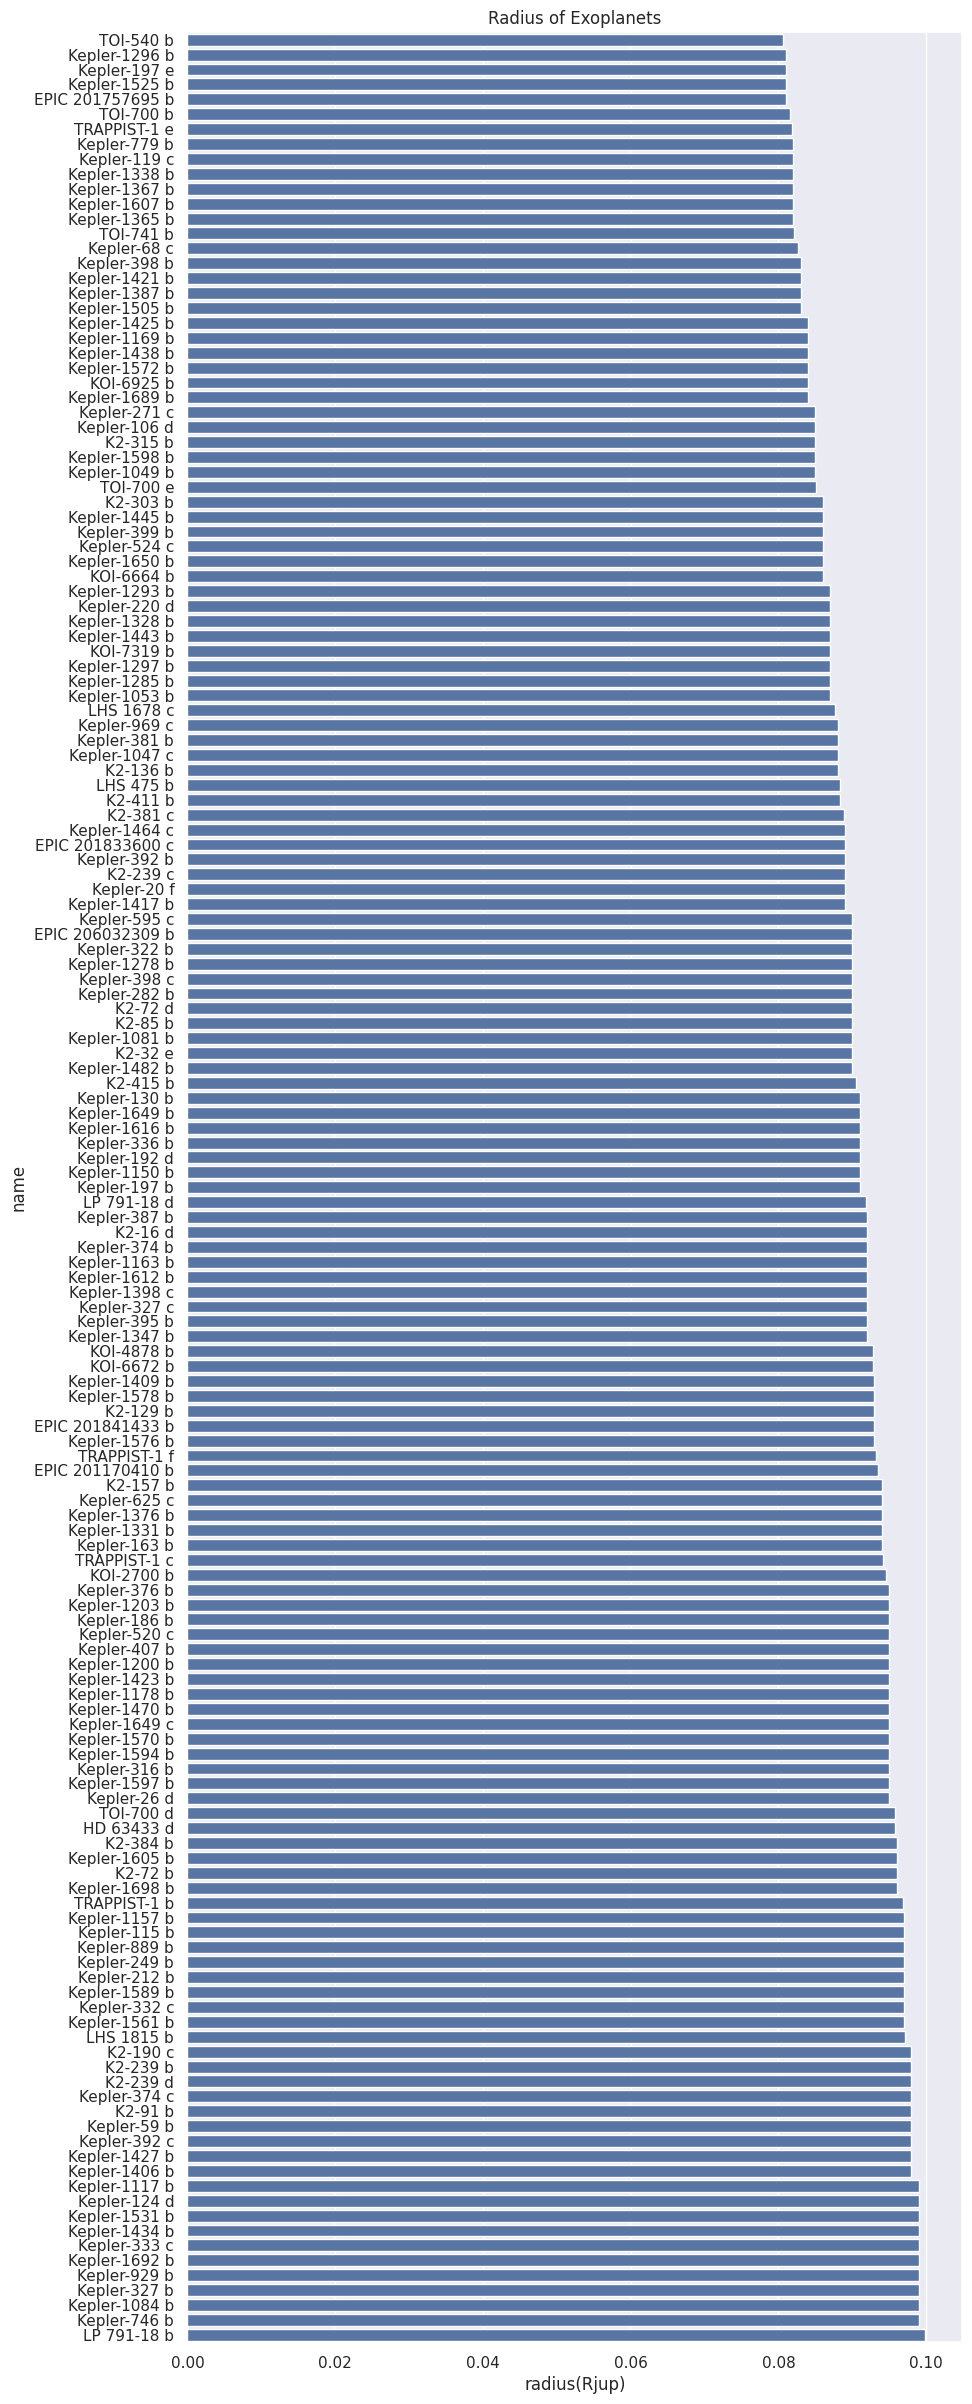

In [ ]:
# Plotting a representation of planets near to Earth's size
radius_df = radius_df.sort_values(["radius(Rjup)"])
plt.figure().set_size_inches(10,30)
plt.title("Radius of Exoplanets")
sns.barplot(data = radius_df, x = "radius(Rjup)", y = "name")

In [ ]:
#period_df = df1.dropna(subset = ["orbital_period(day)"], inplace = True)

In [ ]:
period_df = df1.dropna(subset = ["semi_major_axis"])

In [ ]:
#period_df = period_df.sort_values(["semi_major_axis"])
#plt.title("Semi-Major-Axis")
#sns.barplot(data = period_df, x = "semi_major_axis", y = "name")

In [ ]:
#year_df = df1[(df1["orbital_period(day)"] < 370) & (df1["orbital_period(day)"] > 350)]

In [ ]:
star_type_df = df1.dropna(subset = ["star_sp_type"])

In [ ]:
#year_df.dropna(subset = ["star_sp_type"], inplace = True)
firsts = []
for i in star_type_df["star_sp_type"]:
  firsts.append(i[0])
star_type_df["first"] = firsts

<ipython-input-206-acb568736f9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_type_df["first"] = firsts


Semi-major axis is calculated dependently based off what type of spectral class the star lies in. (may go into sub-categories later)

In [ ]:
df1.dropna(subset = ["semi_major_axis"], inplace = True)

In [ ]:
# firsts = star_type_df["first"].tolist()
# for index in range(len(firsts)):
#   if firsts[index] == 'M':
#     print("found m")
#   else:
#     print("found other")

<Axes: title={'center': 'Star Spectral Type'}, xlabel='first', ylabel='Number of Planets with This Star Type'>

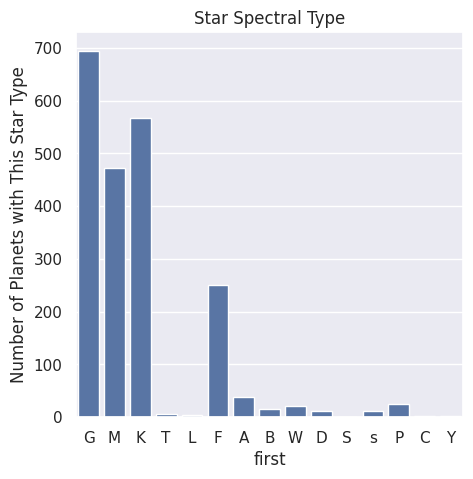

In [ ]:
# The various types of star spectral types in the set of planets identified above through radii measurements
plt.figure().set_size_inches(5,5)
sns.set(palette = "deep")
plt.title("Star Spectral Type")
plt.ylabel("Number of Planets with This Star Type")
sns.countplot(data = star_type_df, x = "first")

In [ ]:
# Drop na temperature values
temp_df = df1.dropna(subset = ["temp_calculated"])

In [ ]:
temp_df = temp_df[(temp_df["temp_calculated"] < 373) & (temp_df["temp_calculated"] > 215)]

In [ ]:
#plt.figure().set_size_inches(5,5)
#plt.title("Length of Day for Exoplanets")
#sns.barplot(data = year_df, x = "orbital_period(day)", y = "name")

<Axes: title={'center': 'Temp Calculated (K)'}, xlabel='temp_calculated', ylabel='name'>

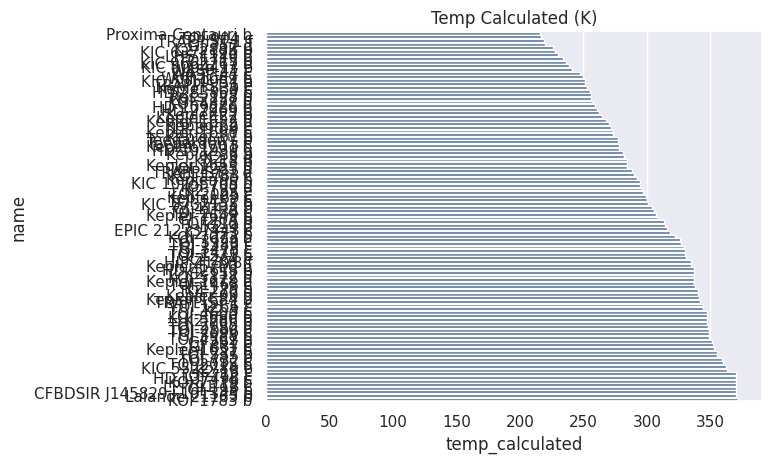

In [ ]:
temp_df = temp_df.sort_values(["temp_calculated"])
plt.title("Temp Calculated (K)")
sns.barplot(data = temp_df, x = "temp_calculated", y = "name")

In [ ]:
final_df = star_type_df.copy()
final_df = final_df[(final_df["radius(Rjup)"] > 0.08) & (final_df["radius(Rjup)"] < 0.1)]
final_df = final_df[(final_df["temp_calculated"] < 373) & (final_df["temp_calculated"] > 215)]

In [ ]:
#Adding Earth row after all the drop NA's
new_row = {'name': 'Earth', "mass(Mjup)":0.00314558, 'radius(Rjup)': 0.0892147, 'orbital_period': 365, 'semi_major_axis': 1, 'temp_calculated': 288, 'first': 'G', 'gravity': 9.8}
final_df = final_df.append(new_row, ignore_index=True)

<ipython-input-215-4bf00a92c8dd>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index=True)


<Axes: title={'center': 'Most Similar Planets to Earth'}, xlabel='temp_calculated', ylabel='name'>

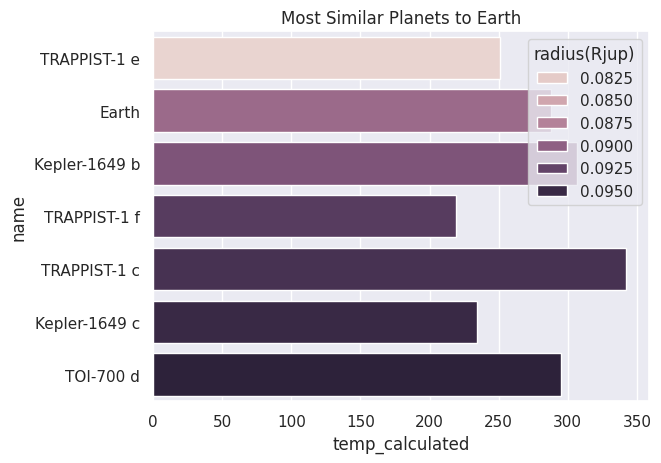

In [ ]:
final_df = final_df.sort_values(["radius(Rjup)"])
plt.title("Most Similar Planets to Earth")
sns.barplot(data = final_df, x = "temp_calculated", y = "name", hue = 'radius(Rjup)')

<Axes: title={'center': 'Star Spectral Type'}, xlabel='first', ylabel='Number of Planets with This Star Type'>

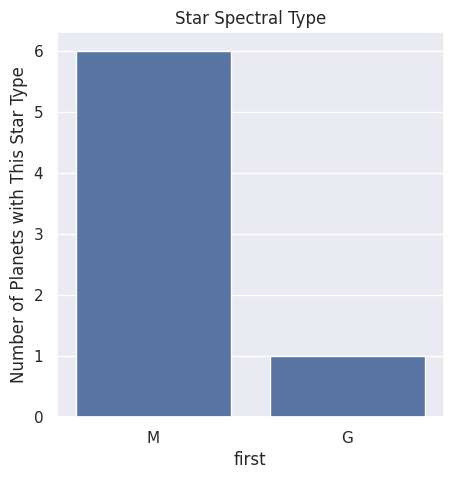

In [ ]:
plt.figure().set_size_inches(5,5)
plt.title("Star Spectral Type")
plt.ylabel("Number of Planets with This Star Type")
sns.countplot(data = final_df, x = "first")

In [ ]:
final_df = final_df.dropna(subset = ["mass(Mjup)"])
masses = []
for i in final_df["mass(Mjup)"]:
  i = i * 1.899*(10**27)
  masses.append(i)
masses = [x for x in masses if x != 'nan']


radii = []
for i in final_df["radius(Rjup)"]:
  i = i * 7.149*(10**7)
  radii.append(i)
radii = [x for x in radii if x != 'nan']



gravities = []
for i in range(len(masses)):
  gravities.append(g_exo(masses[i], radii[i]))



final_df["gravity"] = gravities

<ipython-input-218-211d8218d404>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["gravity"] = gravities


<Axes: title={'center': 'Gravities in Contrast with g'}, xlabel='gravity', ylabel='name'>

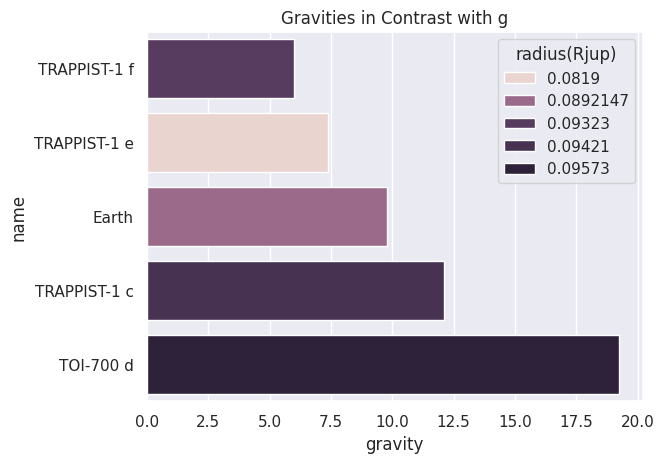

In [ ]:
final_df = final_df.sort_values(["gravity"])
plt.title("Gravities in Contrast with g")
sns.barplot(data = final_df, x = "gravity", y = "name", hue = 'radius(Rjup)')

In [ ]:
# EXAMPLE TEXT BOX!!